In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from joblib import dump, load
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import tensorflow as tf

# Checking the classification Power of the synth data created from data

Data Loading

In [50]:
# df_train = pd.read_csv("../data/interim/split/sorted_train_data_mm.csv")

# synthetic_data_paths = [
#     "../data/interim/split/sorted_train_data_mm.csv",
#     "../data/interim/synthdata_from_data_train.csv",
#     "../data/interim/id1synthdata_from_base_data_256_256_4_test.csv",
#     "../data/interim/id2synthdata_from_base_sample_256_256_4_test.csv",
#     "../data/interim/id1_repeat_data.csv",
#     "../data/interim/id1_repeat_sample.csv",
#     "../data/interim/loc2446_256_512_512_b_0_01_kl_0_001_data.csv",
#     "../data/interim/loc2446_256_512_512_b_0_01_kl_0_001_sample.csv",
#     "../data/interim/loc2446_256_512_512_b_0_01_kl_0_001_data_no_batch.csv",
#     "../data/interim/loc2446_256_512_512_b_0_01_kl_0_001_sample_no_batch.csv",
#     "../data/interim/loc3443_128_128_b_0_01_kl_0_001_sample_no_batch.csv",
#     "../data/interim/loc3443_128_128_b_0_01_kl_0_001_data_no_batch.csv",
#     "../data/interim/loc2600_64_256_256_64_b_10_kl_0_1_no_batch_data.csv",
#     "../data/interim/loc2600_64_256_256_64_b_10_kl_0_1_no_batch_data_sample.csv",
#     "../data/interim/loc2600_64_256_256_64_b_10_kl_0_1_batch_data_sample.csv",
#     "../data/interim/loc3418_64_64_b_10_kl_0_1_no_batch_sample.csv",
#     "../data/interim/2767_256_256_b_0_1_KL_0_0001no_batch_data.csv",
#     "../data/interim/2767_256_256_b_0_1_KL_0_0001no_batch_sample.csv",
#     "../data/interim/id33_128_128_b_1_KL_1no_batch_data.csv",
#     "../data/interim/id33_128_128_b_1_KL_1no_batch_sample.csv",
#     "../data/interim/id35_128_128_b_0_1_KL_1_0001no_batch_data.csv",
#     "../data/interim/id35_128_128_b_0_1_KL_1_0001no_batch_sample.csv",
#     "../data/interim/id3synthdata_from_base_data_256_256_2_test.csv",
#     "../data/interim/id4synthdata_from_base_sample_256_256_2_test.csv",
#     "../data/interim/id5synthdata_from_base_data_256_256_4_test.csv",
#     "../data/interim/id6synthdata_from_base_sample_256_256_4_test.csv",
#     "../data/interim/id7synthdata_from_base_data_512_512_64_test.csv",
#     "../data/interim/id8synthdata_from_base_sample_512_512_64_test.csv",
#     "../data/interim/id9synthdata_from_base_data_256_256_256_256_32_test.csv",
#     "../data/interim/id10synthdata_from_base_sample_256_256_256_256_32_test.csv",
#     "../data/interim/id9_repeat_data.csv",
#     "../data/interim/id9_repeat_sample.csv",
#     "../data/interim/id13synthdata_from_base_data_256_256_32_test.csv",
#     "../data/interim/id14synthdata_from_base_sample_256_256_32_test.csv",
#     "../data/interim/id17synthdata_from_base_data_256_256_256_256_32_test.csv",
#     "../data/interim/id18synthdata_from_base_sample_256_256_256_256_32_test.csv",
#     "../data/interim/id21synthdata_from_base_data_256_256_4_test.csv",
#     "../data/interim/id22synthdata_from_base_sample_256_256_4_test.csv",
#     "../data/interim/id23synthdata_from_base_data_64_64_4_test.csv",
#     "../data/interim/id24synthdata_from_base_sample_64_64_4_test.csv",
#     "../data/interim/id25synthdata_from_base_data_64_64_8_test.csv",
#     "../data/interim/id26synthdata_from_base_sample_64_64_8_test.csv",
#     "../data/interim/id27synthdata_from_base_data_64_64_16_test.csv",
#     "../data/interim/id28synthdata_from_base_sample_64_64_16_test.csv",
#     "../data/interim/id29synthdata_from_base_data_64_64_64_test.csv",
#     "../data/interim/id30synthdata_from_base_sample_64_64_64_test.csv",
#     "../data/interim/id31synthdata_from_base_data_256_256_32_test.csv",
#     "../data/interim/id32synthdata_from_base_sample_256_256_32_test.csv",
#     "../data/interim/loc3586_no_batch_sample.csv",
#     "../data/interim/split/sorted_test_data_mm.csv",
#     "../data/interim/synthdata_from_data_test.csv",
#     "../data/interim/synthdata_from_sample.csv",
#     "../data/interim/generated/cgan2500.csv",
#     "../data/interim/generated/cgan5000.csv",
#     "../data/interim/generated/cgan10000.csv",
#     "../data/interim/generated/CGANEPOCH1.csv",
#     "../data/interim/generated/CGANEPOCH2.csv",
#     "../data/interim/synthdata_from_sample_small_network.csv",
#     "../data/interim/synthdata_from_sample_small_extreme_high_class_1000_loss_low_learning.csv",
#     "../data/interim/synthdata_from_sample_small_extreme_high_class_100_loss_low_learning.csv",
#     "../data/interim/synthdata_from_sample_small_extreme_high_class_10_loss_low_learning.csv",
#     "../data/interim/synthdata_from_data_test_16_dim.csv",
#     "../data/interim/synthdata_from_data_test_24_dim.csv",
#     "../data/interim/synthdata_from_data_test_8_dim.csv",
# ]

# file_names = [path.split("/")[-1].split(".")[0] for path in synthetic_data_paths]

In [51]:
df_train = pd.read_csv("../data/interim/split/sorted_train_data_mm.csv")

synthetic_data_paths = [
    "../data/interim/id1_repeat_data.csv",
    "../data/interim/id1_repeat_sample.csv",
    # this is the experiment with the top values of the d-generation process
    "../data/interim/3646_b_b0_1kl_0_0001_l_64_n512_data_no_batch.csv",
    "../data/interim/3646_b_b0_1kl_0_0001_l_64_n512_sample_no_batch.csv",
    "../data/interim/3646_b_b0_1kl_0_0001_l_64_n512_data_batch.csv",
    "../data/interim/3646_b_b0_1kl_0_0001_l_64_n512_sample_batch.csv",
    "../data/interim/1393_b_b0_1kl_0_0001_l_32_n512_data_no_batch.csv",
    "../data/interim/1393_b_b0_1kl_0_0001_l_32_n512_sample_no_batch.csv",
    "../data/interim/1393_b_b0_1kl_0_0001_l_32_n512_data_batch.csv",
    "../data/interim/1393_b_b0_1kl_0_0001_l_32_n512_sample_batch.csv",
    "../data/interim/966_a_b0_1kl_0_0001_l_16_n256_data_no_batch.csv",
    "../data/interim/966_a_b0_1kl_0_0001_l_16_n256_sample_no_batch.csv",
    "../data/interim/467_a_b0_1kl_0_0001_l_4_n512_data_no_batch.csv",
    "../data/interim/467_a_b0_1kl_0_0001_l_4_n512_sample_no_batch.csv",
    "../data/interim/2767_b_b0_1kl_0_0001_l_2_n256_128_data_no_batch.csv",
    "../data/interim/2767_b_b0_1kl_0_0001_l_2_n256_128_sample_no_batch.csv",
    # here are the values of the s-generation process only sampling
    "../data/interim/1517_c_b1kl_1_l_2_n512_batch_sample_sample.csv",
    "../data/interim/1996_c_b1kl_1_l_4_n256_batch_sample_sample.csv",
    "../data/interim/2078_c_b1kl_1_l_16_n512_batch_sample_sample.csv",
    "../data/interim/2410_c_b01kl_01_l_32_n256_batch_sample_sample.csv",
    "../data/interim/569_c_b1kl_01_l_64_n512_batch_sample_sample.csv",
    # Best model regardin kl_div
    "../data/interim/1161_c_b01kl_0001_l_16_n512_batch_sample_sample.csv",
    # this is the experiment regarding the encoder
    "../data/interim/T2_b_b0_1kl_0_0001_l_64_n1024_512_512_batch_sample.csv",
    "../data/interim/T3_b_b0_1kl_0_0001_l_64_2048_1024_512_batch_sample.csv",
    "../data/interim/T4_b_b0_1kl_0_0001_l_64_4096_2048_512_batch_sample.csv",
    "../data/interim/T5_b_b0_1kl_0_0001_l_64_8192_4096_512_batch_sample.csv",
    # now we have the latent dimension experiment, i somehow forgot to update the t
    "../data/interim/T6_b_b0_1kl_0_0001_l_16_512_256_512_batch_sample.csv",
    "../data/interim/T6_b_b0_1kl_0_0001_l_32_512_256_512_batch_sample.csv",
    "../data/interim/T6_b_b0_1kl_0_0001_l_64_512_256_512_batch_sample.csv",
    "../data/interim/T6_b_b0_1kl_0_0001_l_128_512_256_512_batch_sample.csv",
    "../data/interim/T6_b_b0_1kl_0_0001_l_128_512_256_512_batch_sample_fully_trained.csv",
    "../data/interim/split/sorted_test_data_mm.csv",
    "../data/interim/privacy_testing/Epoch_150_synthdata_from_sample_test_random_sample_for_privacy.csv",
    # back to cgan to compare
    "../data/interim/generated/cgan2500.csv",
    "../data/interim/generated/cgan5000.csv",
    "../data/interim/generated/cgan10000.csv",
    "../data/interim/generated/CGANEPOCH1.csv",
    "../data/interim/generated/CGANEPOCH2.csv",
    # Oversampling
    "../data/interim/1517_c_b1kl_1_l_2_n512_oversample_02_sample.csv",
    "../data/interim/1517_c_b1kl_1_l_2_n512_oversample_01_sample.csv",
    "../data/interim/1517_c_b1kl_1_l_2_n512_oversample_005_sample.csv",
    "../data/interim/1517_c_b1kl_1_l_2_n512_oversample_001_sample.csv",
]

file_names = [path.split("/")[-1].split(".")[0] for path in synthetic_data_paths]

In [52]:
synth_data_dict = {}

for path, file_name in zip(synthetic_data_paths, file_names):
    synth_data_dict[file_name] = {}
    synth_data = pd.read_csv(path)
    synth_data_dict[file_name]["X"] = synth_data.values[:, :-1]
    synth_data_dict[file_name]["y"] = synth_data.values[:, -1]

Train Random forest and Logistic Regression on original data

In [53]:
# # load train_data
# X = synth_data_dict["sorted_train_data_mm"]["X"]
# y = synth_data_dict["sorted_train_data_mm"]["y"]

# # Random Forest
# random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# random_forest.fit(X, y)
# dump(random_forest, "../models/Classifier/random_forest_model.joblib")

# # Logistic Regression
# logistic_regression = LogisticRegression()
# logistic_regression.fit(X, y)
# dump(logistic_regression, "../models/Classifier/logistic_regression.joblib")

# load the models

In [54]:
random_forest = load("../models/Classifier/random_forest_model.joblib")
logistic_regression = load("../models/Classifier/logistic_regression.joblib")

In [55]:
def evaluate_model_performance_classification(model, X, y, name, *args):
    # Predictions on training and testing data
    y_pred = model.predict(X)
    # Accuracy scores
    accuracy = accuracy_score(y, y_pred)
    # Recall scores
    recall = recall_score(y, y_pred)
    # Precision
    precision = precision_score(y, y_pred)
    # F1 scores
    f1 = f1_score(y, y_pred)
    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)

    mean_diff_list = []
    kl_div_list = []

    for column1, column2 in zip(
        np.transpose(synth_data_dict["sorted_test_data_mm"]["X"]),
        np.transpose(X)):

        mean_diff_list.append(np.mean(column1) - np.mean(column2))

        hist_test, _ = np.histogram(
            column1, bins=40
        )
        hist_prob_test = hist_test / len(column1)

        hist_synth, _ = np.histogram(
            column2, bins=40
        )
        hist_prob_synth = hist_synth / len(column2)

        kl_div = tf.keras.losses.kullback_leibler_divergence(hist_prob_test, hist_prob_synth)
        kl_div_list.append(kl_div.numpy())

    mean_class = sum(y)/len(y)  
    mean_diff = np.sum(mean_diff_list) / len(mean_diff_list)
    kl_div_value = np.sum(kl_div_list) / len(kl_div_list)

    # Create new row
    row =  [model, name, accuracy, recall, precision, f1, conf_matrix, mean_diff, mean_class, kl_div_value] #mean_f_value, p_value_low, p_value_up]

    return row

In [56]:
#  f_list = []
#     for column1, column2 in zip(
#         np.transpose(synth_data_dict["sorted_test_data_mm"]["X"]), np.transpose(X)
#     ):

#         variance1 = np.var(column1, ddof=1)
#         variance2 = np.var(column2, ddof=1)

#         # Calculate the F-statistic
#         f_value = variance1 / variance2
#         f_list.append(f_value)

#     mean_f_value = np.sum(f_list)/len(f_list)
#     # Calculate the degrees of freedom
#     df1 = len(synth_data_dict["sorted_test_data_mm"]["X"]) - 1
#     df2 = len(X) - 1

#     # Calculate the p-value
#     p_value_up = stats.f.cdf(mean_f_value, df1, df2)
#     p_value_low = stats.f.cdf(mean_f_value, df2, df1)


#  "mean_f_value",
#         "p_value_low",
#         "p_value_up"

In [57]:
df_evaluation = pd.DataFrame(
    columns=[
        "Model",
        "Data Set",
        "Accuracy",
        "Recall",
        "Precision",
        "F1 Score",
        "Confusion Matrix",
        "mean_diff",
        "mean_class",
        "kl_div_value",
    ]
)

for key in synth_data_dict:
    X = synth_data_dict[key]["X"]
    y = synth_data_dict[key]["y"]
    evaluation_result = evaluate_model_performance_classification(random_forest, X, y, key)
    df_evaluation.loc[len(df_evaluation)] = evaluation_result

# for key in synth_data_dict:
#     X = synth_data_dict[key]["X"]
#     y = synth_data_dict[key]["y"]
#     evaluation_result = evaluate_model_performance_classification(
#         logistic_regression, X, y, key
#     )
#     df_evaluation.loc[len(df_evaluation)] = evaluation_result

c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\skl

In [58]:
df_data = df_evaluation.query(
    '`Data Set`.str.contains("no_batch") and `Data Set`.str.contains("data")'
)
df_data['latent'] = [64, 32, 16, 4, 2]

C:\Users\Max_G\AppData\Local\Temp\ipykernel_7460\1360760692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['latent'] = [64, 32, 16, 4, 2]


c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

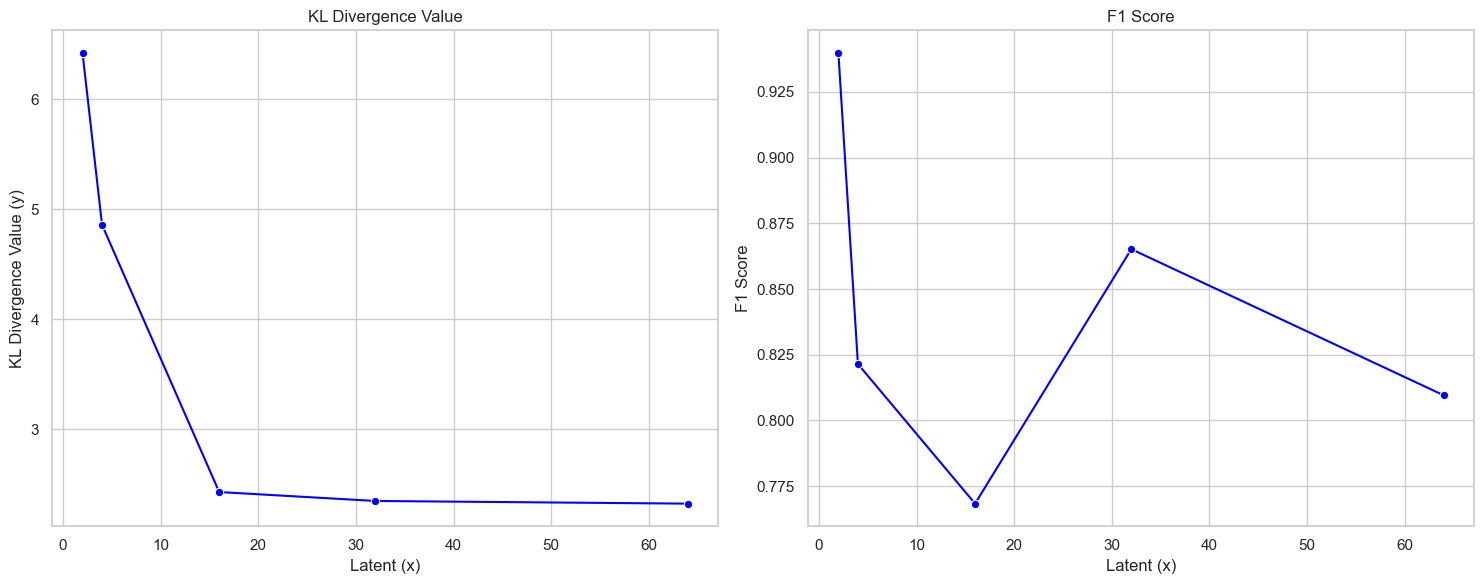

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Set style
sns.set(style="whitegrid")

# Plot KL Divergence Value on the first subplot
sns.lineplot(
    data=df_data, x="latent", y="kl_div_value", marker="o", color="blue", ax=axes[0]
)
axes[0].set_xlabel("Latent (x)")
axes[0].set_ylabel("KL Divergence Value (y)")
axes[0].set_title("KL Divergence Value")

# Plot F1 Score on the second subplot
sns.lineplot(
    data=df_data, x="latent", y="F1 Score", marker="o", color="blue", ax=axes[1]
)
axes[1].set_xlabel("Latent (x)")
axes[1].set_ylabel("F1 Score")
axes[1].set_title("F1 Score")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
df_data.sort_values("F1 Score")

,Model,Data Set,Accuracy,Recall,Precision,F1 Score,Confusion Matrix,mean_diff,mean_class,kl_div_value,latent
10,"(DecisionTreeClassifier(max_depth=10, max_feat...",966_a_b0_1kl_0_0001_l_16_n256_data_no_batch,0.999333,0.684783,0.875000,0.768293,"[[56861, 9], [29, 63]]",0.000076,0.001615,2.427511,16
2,"(DecisionTreeClassifier(max_depth=10, max_feat...",3646_b_b0_1kl_0_0001_l_64_n512_data_no_batch,0.999438,0.739130,0.894737,0.809524,"[[56862, 8], [24, 68]]",-0.000085,0.001615,2.322000,64
12,"(DecisionTreeClassifier(max_depth=10, max_feat...",467_a_b0_1kl_0_0001_l_4_n512_data_no_batch,0.999473,0.750000,0.907895,0.821429,"[[56863, 7], [23, 69]]",0.001596,0.001615,4.857539,4
6,"(DecisionTreeClassifier(max_depth=10, max_feat...",1393_b_b0_1kl_0_0001_l_32_n512_data_no_batch,0.999579,0.836957,0.895349,0.865169,"[[56861, 9], [15, 77]]",-0.000084,0.001615,2.346215,32
14,"(DecisionTreeClassifier(max_depth=10, max_feat...",2767_b_b0_1kl_0_0001_l_2_n256_128_data_no_batch,0.999807,0.934783,0.945055,0.939891,"[[56865, 5], [6, 86]]",0.000459,0.001615,6.421584,2


In [61]:
df_evaluation.query(
    '`Data Set`.str.contains("sample")'
).sort_values("F1 Score", ascending=True).sort_values("F1 Score")

,Model,Data Set,Accuracy,Recall,Precision,F1 Score,Confusion Matrix,mean_diff,mean_class,kl_div_value
7,"(DecisionTreeClassifier(max_depth=10, max_feat...",1393_b_b0_1kl_0_0001_l_32_n512_sample_no_batch,0.997068,0.000000,0.000000,0.000000,"[[56795, 134], [33, 0]]",0.003161,0.000579,6.460149
11,"(DecisionTreeClassifier(max_depth=10, max_feat...",966_a_b0_1kl_0_0001_l_16_n256_sample_no_batch,0.999772,0.000000,0.000000,0.000000,"[[56949, 10], [3, 0]]",0.000685,0.000053,2.561074
18,"(DecisionTreeClassifier(max_depth=10, max_feat...",2078_c_b1kl_1_l_16_n512_batch_sample_sample,1.000000,0.000000,0.000000,0.000000,[[56962]],0.002899,0.000000,9.442792
20,"(DecisionTreeClassifier(max_depth=10, max_feat...",569_c_b1kl_01_l_64_n512_batch_sample_sample,0.999982,0.000000,0.000000,0.000000,"[[56961, 0], [1, 0]]",-0.002543,0.000018,4.903066
25,"(DecisionTreeClassifier(max_depth=10, max_feat...",T5_b_b0_1kl_0_0001_l_64_8192_4096_512_batch_sa...,0.475194,0.396825,0.010934,0.021281,"[[26743, 29400], [494, 325]]",0.154471,0.014378,2.808160
13,"(DecisionTreeClassifier(max_depth=10, max_feat...",467_a_b0_1kl_0_0001_l_4_n512_sample_no_batch,0.999280,0.047619,0.045455,0.046512,"[[56920, 21], [20, 1]]",0.001649,0.000369,3.554259
9,"(DecisionTreeClassifier(max_depth=10, max_feat...",1393_b_b0_1kl_0_0001_l_32_n512_sample_batch,0.993013,0.080882,0.038732,0.052381,"[[56553, 273], [125, 11]]",0.001912,0.002388,4.952485
29,"(DecisionTreeClassifier(max_depth=10, max_feat...",T6_b_b0_1kl_0_0001_l_128_512_256_512_batch_sample,0.901566,0.084826,0.039940,0.054309,"[[51194, 3870], [1737, 161]]",-0.315041,0.033320,2.655940
24,"(DecisionTreeClassifier(max_depth=10, max_feat...",T4_b_b0_1kl_0_0001_l_64_4096_2048_512_batch_sa...,0.037622,1.000000,0.037453,0.072201,"[[10, 54819], [0, 2133]]",1.992502,0.037446,2.553666
22,"(DecisionTreeClassifier(max_depth=10, max_feat...",T2_b_b0_1kl_0_0001_l_64_n1024_512_512_batch_sa...,0.726835,0.170358,0.145122,0.156731,"[[39956, 8518], [7042, 1446]]",-0.174520,0.149012,2.685391


In [62]:
df_evaluation.sort_values("F1 Score", ascending=False)

,Model,Data Set,Accuracy,Recall,Precision,F1 Score,Confusion Matrix,mean_diff,mean_class,kl_div_value
35,"(DecisionTreeClassifier(max_depth=10, max_feat...",cgan10000,0.999930,0.956522,1.000000,0.977778,"[[56870, 0], [4, 88]]",0.023576,0.001615,5.129569
34,"(DecisionTreeClassifier(max_depth=10, max_feat...",cgan5000,0.999877,0.945652,0.977528,0.961326,"[[56868, 2], [5, 87]]",0.022063,0.001615,3.872261
17,"(DecisionTreeClassifier(max_depth=10, max_feat...",1996_c_b1kl_1_l_4_n256_batch_sample_sample,0.999982,0.923077,1.000000,0.960000,"[[56949, 0], [1, 12]]",-0.000038,0.000228,5.456435
38,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_02_sample,0.988712,0.930983,0.980502,0.955101,"[[49480, 136], [507, 6839]]",0.004420,0.128963,4.239298
14,"(DecisionTreeClassifier(max_depth=10, max_feat...",2767_b_b0_1kl_0_0001_l_2_n256_128_data_no_batch,0.999807,0.934783,0.945055,0.939891,"[[56865, 5], [6, 86]]",0.000459,0.001615,6.421584
40,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_005_sample,0.998754,0.892922,0.976190,0.932701,"[[56399, 12], [59, 492]]",0.000691,0.009673,2.602489
41,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_001_sample,0.999368,1.000000,0.829384,0.906736,"[[56751, 36], [0, 175]]",-0.000788,0.003072,4.228778
39,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_01_sample,0.995260,0.811321,1.000000,0.895833,"[[55531, 0], [270, 1161]]",-0.000104,0.025122,2.666527
6,"(DecisionTreeClassifier(max_depth=10, max_feat...",1393_b_b0_1kl_0_0001_l_32_n512_data_no_batch,0.999579,0.836957,0.895349,0.865169,"[[56861, 9], [15, 77]]",-0.000084,0.001615,2.346215
31,"(DecisionTreeClassifier(max_depth=10, max_feat...",sorted_test_data_mm,0.999544,0.771739,0.934211,0.845238,"[[56865, 5], [21, 71]]",0.000000,0.001615,0.000000


In [63]:
pd.set_option("display.max_rows", None)
df_evaluation.sort_values("F1 Score", ascending=False)

,Model,Data Set,Accuracy,Recall,Precision,F1 Score,Confusion Matrix,mean_diff,mean_class,kl_div_value
35,"(DecisionTreeClassifier(max_depth=10, max_feat...",cgan10000,0.999930,0.956522,1.000000,0.977778,"[[56870, 0], [4, 88]]",0.023576,0.001615,5.129569
34,"(DecisionTreeClassifier(max_depth=10, max_feat...",cgan5000,0.999877,0.945652,0.977528,0.961326,"[[56868, 2], [5, 87]]",0.022063,0.001615,3.872261
17,"(DecisionTreeClassifier(max_depth=10, max_feat...",1996_c_b1kl_1_l_4_n256_batch_sample_sample,0.999982,0.923077,1.000000,0.960000,"[[56949, 0], [1, 12]]",-0.000038,0.000228,5.456435
38,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_02_sample,0.988712,0.930983,0.980502,0.955101,"[[49480, 136], [507, 6839]]",0.004420,0.128963,4.239298
14,"(DecisionTreeClassifier(max_depth=10, max_feat...",2767_b_b0_1kl_0_0001_l_2_n256_128_data_no_batch,0.999807,0.934783,0.945055,0.939891,"[[56865, 5], [6, 86]]",0.000459,0.001615,6.421584
40,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_005_sample,0.998754,0.892922,0.976190,0.932701,"[[56399, 12], [59, 492]]",0.000691,0.009673,2.602489
41,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_001_sample,0.999368,1.000000,0.829384,0.906736,"[[56751, 36], [0, 175]]",-0.000788,0.003072,4.228778
39,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_01_sample,0.995260,0.811321,1.000000,0.895833,"[[55531, 0], [270, 1161]]",-0.000104,0.025122,2.666527
6,"(DecisionTreeClassifier(max_depth=10, max_feat...",1393_b_b0_1kl_0_0001_l_32_n512_data_no_batch,0.999579,0.836957,0.895349,0.865169,"[[56861, 9], [15, 77]]",-0.000084,0.001615,2.346215
31,"(DecisionTreeClassifier(max_depth=10, max_feat...",sorted_test_data_mm,0.999544,0.771739,0.934211,0.845238,"[[56865, 5], [21, 71]]",0.000000,0.001615,0.000000


In [64]:
df_evaluation.query("`Data Set`.str.contains('sample')").sort_values("F1 Score", ascending=False)

,Model,Data Set,Accuracy,Recall,Precision,F1 Score,Confusion Matrix,mean_diff,mean_class,kl_div_value
17,"(DecisionTreeClassifier(max_depth=10, max_feat...",1996_c_b1kl_1_l_4_n256_batch_sample_sample,0.999982,0.923077,1.000000,0.960000,"[[56949, 0], [1, 12]]",-0.000038,0.000228,5.456435
38,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_02_sample,0.988712,0.930983,0.980502,0.955101,"[[49480, 136], [507, 6839]]",0.004420,0.128963,4.239298
40,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_005_sample,0.998754,0.892922,0.976190,0.932701,"[[56399, 12], [59, 492]]",0.000691,0.009673,2.602489
41,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_001_sample,0.999368,1.000000,0.829384,0.906736,"[[56751, 36], [0, 175]]",-0.000788,0.003072,4.228778
39,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_oversample_01_sample,0.995260,0.811321,1.000000,0.895833,"[[55531, 0], [270, 1161]]",-0.000104,0.025122,2.666527
16,"(DecisionTreeClassifier(max_depth=10, max_feat...",1517_c_b1kl_1_l_2_n512_batch_sample_sample,0.999702,0.564103,1.000000,0.721311,"[[56923, 0], [17, 22]]",0.000050,0.000685,6.303054
19,"(DecisionTreeClassifier(max_depth=10, max_feat...",2410_c_b01kl_01_l_32_n256_batch_sample_sample,0.999965,1.000000,0.500000,0.666667,"[[56958, 2], [0, 2]]",0.000346,0.000035,9.469898
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",id1_repeat_sample,0.999912,0.333333,0.666667,0.444444,"[[56955, 1], [4, 2]]",0.003517,0.000105,4.454869
21,"(DecisionTreeClassifier(max_depth=10, max_feat...",1161_c_b01kl_0001_l_16_n512_batch_sample_sample,0.999789,0.266667,0.800000,0.400000,"[[56946, 1], [11, 4]]",-0.000213,0.000263,3.149961
5,"(DecisionTreeClassifier(max_depth=10, max_feat...",3646_b_b0_1kl_0_0001_l_64_n512_sample_batch,0.751466,0.478941,0.295021,0.365128,"[[38734, 9728], [4429, 4071]]",0.036612,0.149222,4.075755


# Checking the regression and correlation Power of the synth data created from data

# Calculate correlations

## Creation of the datasets

In [65]:
# Test_data dictionary
test_data_dict = {}

for key in synth_data_dict.keys():
    if len(synth_data_dict[key]["X"]) == 56962:
        X = synth_data_dict[key]["X"]
        test_data_dict[key] = X
    else:
        pass

# Train Data Dictionary
train_data_dict = {}

for key in synth_data_dict:
    if len(synth_data_dict[key]["X"]) == 199364:
        train_data_dict[key] = synth_data_dict[key]["X"]

In [66]:
# Sorted test data dictionary, because the data had an original ordering

test_data_dict = {}
sorted_test_data_dict = {}

for key in synth_data_dict.keys():
    # leaving out data, that has still or already has an ordering
    if key == "synthdata_from_data_test" or key == "sorted_test_data_mm":
        sorted_test_data_dict[key] = synth_data_dict[key]["X"]
    elif (
        len(synth_data_dict[key]["X"]) == 56962
    ):
        X = synth_data_dict[key]["X"]
        sorted_indices = np.argsort(X[:, 0])
        sorted_data = X[sorted_indices]
        sorted_test_data_dict[key] = sorted_data
    else:
        pass

## Columnwise Correlations between orginal data and synth data

In [67]:
# Calcualte the correlation for the sorted test data

for key in list(sorted_test_data_dict.keys()):
    corr_list = []
    for i in range(0, 30):
        corr = np.corrcoef(
            sorted_test_data_dict["sorted_test_data_mm"][:, i],
            sorted_test_data_dict[key][:, i],
        )[0, 1]
        corr_list.append(corr)
    mean_corr = np.mean(corr_list)
    print(f"Mean correlation for key {key}: {mean_corr}")

Mean correlation for key id1_repeat_data: 0.03248867810548032
Mean correlation for key id1_repeat_sample: 0.03275890536821562
Mean correlation for key 3646_b_b0_1kl_0_0001_l_64_n512_data_no_batch: 0.08407186745142803
Mean correlation for key 3646_b_b0_1kl_0_0001_l_64_n512_sample_no_batch: 0.024708915514040655
Mean correlation for key 3646_b_b0_1kl_0_0001_l_64_n512_data_batch: 0.08544166940477699
Mean correlation for key 3646_b_b0_1kl_0_0001_l_64_n512_sample_batch: 0.0329267563111453
Mean correlation for key 1393_b_b0_1kl_0_0001_l_32_n512_data_no_batch: 0.08230100374766043
Mean correlation for key 1393_b_b0_1kl_0_0001_l_32_n512_sample_no_batch: 0.04194186304660307
Mean correlation for key 1393_b_b0_1kl_0_0001_l_32_n512_data_batch: 0.08482614286981514
Mean correlation for key 1393_b_b0_1kl_0_0001_l_32_n512_sample_batch: 0.036911256456888863
Mean correlation for key 966_a_b0_1kl_0_0001_l_16_n256_data_no_batch: 0.08454044661050411
Mean correlation for key 966_a_b0_1kl_0_0001_l_16_n256_samp

In [68]:
for key in list(test_data_dict.keys()):
    corr_list = []
    for i in range(0, 30):
        corr = np.corrcoef(
            test_data_dict["sorted_test_data_mm"][:, i],
            test_data_dict[key][:, i],
        )[0, 1]
        corr_list.append(corr)
    mean_corr = np.mean(corr_list)
    print(f"Mean correlation for key {key}: {mean_corr}")

In [69]:
for key in list(train_data_dict.keys()):
    corr_list = []
    for i in range(0, 30):
        corr = np.corrcoef(
            train_data_dict["sorted_train_data_mm"][:, i],
            train_data_dict[key][:, i],
        )[0, 1]
        corr_list.append(corr)
    mean_corr = np.mean(corr_list)
    print(f"Mean correlation for key {key}: {mean_corr}")

# Regression

In [70]:
def create_regression(X, y):
    model = LinearRegression()
    # Predictions on training and testing data
    fitted_regresion = model.fit(X, y)
    y_pred = fitted_regresion.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return mse, r2, fitted_regresion

In [71]:
def evaluate_model_performance_regression(X, y, fitted_regression):
    y_pred = fitted_regression.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Create the regression for the train data

In [72]:
regression_dict_train = {}

mse_list = []
r2_list = []

for i in range(30):
    X = np.delete(train_data_dict["sorted_train_data_mm"], i, axis=1)
    y = train_data_dict["sorted_train_data_mm"][:, i]
    mse, r2, fitted_regression =create_regression(X, y)


    regression_dict_train[i] = {}
    regression_dict_train[i]["mse"] = mse
    regression_dict_train[i]["r2"] = r2
    regression_dict_train[i]["model"] = fitted_regression
    regression_dict_train[i]["parameter"] = fitted_regression.coef_

    mse_list.append(mse)
    r2_list.append(r2)

print(f"The mean mse of all columns is {sum(mse_list)/len(mse_list)}")
print(f" The mean r2 of all columns is {sum(r2_list)/len(r2_list)}")

KeyError: 'sorted_train_data_mm'

# Evaluate Regression for the train data

In [ ]:
mse_eval_list = []
r2_eval_list = []

for i in range(30):
    X = np.delete(train_data_dict["synthdata_from_data_train"], i, axis=1)
    y = train_data_dict["synthdata_from_data_train"][:, i]

    fitted_regression = regression_dict_train[i]["model"]
    mse_eval, r2_eval = evaluate_model_performance_regression(X, y, fitted_regression)

    mse_eval_list.append(mse_eval)
    r2_eval_list.append(r2_eval)

print(f"The mean mse of all columns eval is {sum(mse_eval_list)/len(mse_eval_list)}")
print(f" The mean r2 of all columns is {sum(r2_eval_list)/len(r2_eval_list)}")

The mean mse of all columns eval is 0.002742998123962313
 The mean r2 of all columns is -0.45099207024849586


# Create the Regression for the test data

In [ ]:
regression_dict_test = {}

mse_list = []
r2_list = []

for i in range(30):
    X = np.delete(sorted_test_data_dict["sorted_test_data_mm"], i, axis=1)
    y = sorted_test_data_dict["sorted_test_data_mm"][:, i]
    mse, r2, fitted_regression = create_regression(X, y)

    regression_dict_test[i] = {}
    regression_dict_test[i]["mse"] = mse
    regression_dict_test[i]["r2"] = r2
    regression_dict_test[i]["model"] = fitted_regression

    mse_list.append(mse)
    r2_list.append(r2)

print(f"The mean mse of all columns is {sum(mse_list)/len(mse_list)}")
print(f" The mean r2 of all columns is {sum(r2_list)/len(r2_list)}")

The mean mse of all columns is 0.0028647283347766517
 The mean r2 of all columns is 0.2368110425314998


In [ ]:
for key in sorted_test_data_dict.keys():
    print(key)

id1_repeat_data
id1_repeat_sample
3646_a_b0_1kl_0_0001_l_64_n512_data_no_batch
3646_a_b0_1kl_0_0001_l_64_n512_sample_no_batch
sorted_test_data_mm
synthdata_from_data_test
synthdata_from_sample


In [ ]:
test_eval_dict = {}

for key in sorted_test_data_dict.keys():
    test_eval_dict[key] = {}
    mse_list = []
    r2_list = []

    for i in range(30):
        X = np.delete(sorted_test_data_dict[key], i, axis=1)
        y = sorted_test_data_dict[key][:, i]
        model = regression_dict_test[i]["model"]
        mse, r2 = evaluate_model_performance_regression(X, y, model)
        mse_list.append(mse)
        r2_list.append(r2)
    mse_mean = sum(mse_list) / len(mse_list)
    r2_mean = sum(r2_list) / len(r2_list)

    test_eval_dict[key]["mse"] = mse_mean
    test_eval_dict[key]["r2"] = r2_mean
    test_eval_dict[key]["mse_list"] = mse_list
    test_eval_dict[key]["r2_list"] = r2_list
    correlation_mse = np.corrcoef(
        test_eval_dict["sorted_test_data_mm"]["mse_list"], test_eval_dict[key]["mse_list"]
    )[0, 1]
    test_eval_dict[key]["correlation_mse"] = correlation_mse
    correlation_r2 = np.corrcoef(
        test_eval_dict["sorted_test_data_mm"]["r2_list"], test_eval_dict[key]["r2_list"]
    )[0, 1]
    test_eval_dict[key]["correlation_r2"] = correlation_r2

    print(f"The mean mse value for all columns of table {key} is {mse_mean}")
    print(f"The mean r2 value for all columns  of table {key} is {r2_mean} ")
    print(f"The correlation for mse of all columns of table {key} is {correlation_mse}")
    print(f"The correlation for r2 of all columns of table {key} is {correlation_r2}")

KeyError: 'sorted_test_data_mm'